### A quick Exploration of 
#### the Employed population by age, sex and industry offered by The United Nations Statistics Division


The Data is offered on http://data.un.org/Data.aspx?d=POP&f=tableCode%3a321

After downloading the csv file on my local desktop, I will be reading the file



In [256]:

## Import all necessery Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [280]:
df = pd.read_csv('UNdata_Export_20181002_005624262.csv', low_memory = False)

In [260]:
df[:10]

,Country or Area,Year,Area,Sex,Age,Industry,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Australia,2016,Total,Male,15 - 19,"Agriculture, hunting and forestry (ISIC Rev.3/...",Census - de jure - complete tabulation,"Final figure, complete",2017.0,6244.0,1
1,Australia,2016,Total,Male,15 - 19,Fishing (ISIC Rev.3/3.1: Section B),Census - de jure - complete tabulation,"Final figure, complete",2017.0,231.0,1
2,Australia,2016,Total,Male,15 - 19,Mining and quarrying (ISIC Rev.3/3.1: Section C),Census - de jure - complete tabulation,"Final figure, complete",2017.0,762.0,1
3,Australia,2016,Total,Male,15 - 19,Manufacturing (ISIC Rev.3/3.1: Section D),Census - de jure - complete tabulation,"Final figure, complete",2017.0,14259.0,1
4,Australia,2016,Total,Male,15 - 19,"Electricity, gas and water supply (ISIC Rev.3/...",Census - de jure - complete tabulation,"Final figure, complete",2017.0,546.0,1
5,Australia,2016,Total,Male,15 - 19,Construction (ISIC Rev.3/3.1: Section F),Census - de jure - complete tabulation,"Final figure, complete",2017.0,33496.0,1
6,Australia,2016,Total,Male,15 - 19,Wholesale and retail trade; repair of motor ve...,Census - de jure - complete tabulation,"Final figure, complete",2017.0,66738.0,1
7,Australia,2016,Total,Male,15 - 19,Hotels and restaurants (ISIC Rev.3/3.1: Sectio...,Census - de jure - complete tabulation,"Final figure, complete",2017.0,73149.0,1
8,Australia,2016,Total,Male,15 - 19,"Transport, storage and communications (ISIC Re...",Census - de jure - complete tabulation,"Final figure, complete",2017.0,5242.0,1
9,Australia,2016,Total,Male,15 - 19,Financial intermediation (ISIC Rev.3/3.1: Sec...,Census - de jure - complete tabulation,"Final figure, complete",2017.0,1057.0,1


In [281]:
df = df.dropna()
df.iloc[:3,]


,Country or Area,Year,Area,Sex,Age,Industry,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Australia,2016,Total,Male,15 - 19,"Agriculture, hunting and forestry (ISIC Rev.3/...",Census - de jure - complete tabulation,"Final figure, complete",2017.0,6244.0,1
1,Australia,2016,Total,Male,15 - 19,Fishing (ISIC Rev.3/3.1: Section B),Census - de jure - complete tabulation,"Final figure, complete",2017.0,231.0,1
2,Australia,2016,Total,Male,15 - 19,Mining and quarrying (ISIC Rev.3/3.1: Section C),Census - de jure - complete tabulation,"Final figure, complete",2017.0,762.0,1


In [282]:

def fixindust (anydf):
    for i in range(0,len(df.Industry)):
        anydf.iloc[i, 5] =anydf.iloc[i,5].split()[0]     

fixindust(df)




In [283]:
male_df = df.loc[lambda df: df['Sex'] == "Male" , :]
female_df = df.loc[lambda df: df['Sex'] == "Female",:]
male_df = male_df[male_df.Industry != 'Unknown' ]
male_df = male_df[male_df.Industry != 'Not' ]
female_df = female_df[female_df.Industry != 'Unknown']
female_df = female_df[female_df.Industry != 'Not']


In [291]:
male_overall = male_df.groupby('Industry').aggregate(np.sum)
male_overall_age = male_df.groupby('Age').aggregate(np.sum)
male_overall_age = male_overall_age[male_overall_age.index.values != 'Total']
male_overall_age = male_overall_age.drop(male_overall_age.index[:4])
female_overall = female_df.groupby('Industry').aggregate(np.sum)
female_overall_age = female_df.groupby('Age').aggregate(np.sum)
female_overall_age = female_overall_age[female_overall_age.index.values != 'Total']
female_overall_age = female_overall_age.drop(female_overall_age.index[:4])

In [285]:
male_overall = male_overall.sort_values(by=['Value'])

male_top = male_overall.iloc[:10,]

female_overall = female_overall.sort_values(by=['Value'])

female_top = female_overall.iloc[:10,]

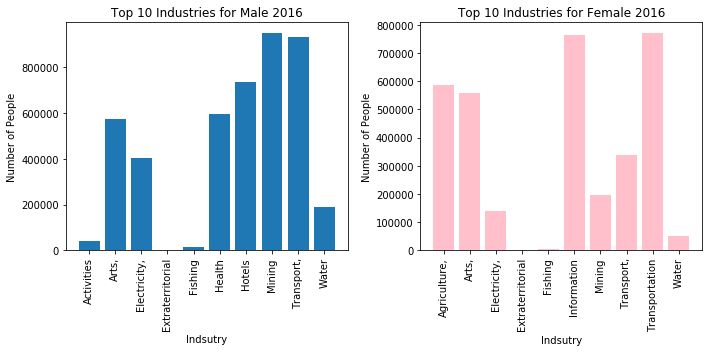

In [286]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(male_top.index.values, male_top['Value'])
plt.ylabel('Number of People')
plt.xlabel('Indsutry')
plt.title('Top 10 Industries for Male 2016')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(female_top.index.values, female_top['Value'], color = 'pink')
plt.ylabel('Number of People')
plt.xlabel('Indsutry')
plt.title('Top 10 Industries for Female 2016')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the above figures, we can clearly see that mining has the most number of Male workers. While the top female industry is Transportation.



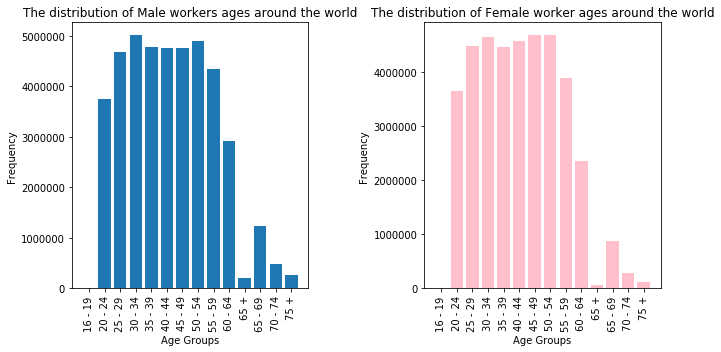

In [292]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(male_overall_age.index.values, male_overall_age['Value'])
plt.ylabel('Frequency')
plt.xlabel('Age Groups')
plt.title('The distribution of Male workers ages around the world')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(female_overall_age.index.values, female_overall_age['Value'],  color = 'pink')
plt.ylabel('Frequency')
plt.xlabel('Age Groups')
plt.title('The distribution of Female worker ages around the world')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

It is interesting to see the similarity in the distribution of age groups for both male and female employed